# Drylab: Perform single cell analysis, integrating with CRISPRa screen

In [1]:
import lamindb as ln
import lnschema_bionty as lb
import scanpy as sc

✅ loaded instance: laminlabs/lamindata (lamindb 0.51.0)


In [2]:
ln.track()

💡 notebook imports: lamindb==0.51.0 lnschema_bionty==0.29.0 scanpy==1.9.3
✅ saved: Transform(id='lEVRZ3cfzpu6qH', name='Perform single cell analysis, integrating with CRISPRa screen', short_name='6-compbio', version='4', type=notebook, updated_at=2023-08-25 20:45:21, created_by_id='FBa7SHjn')
✅ saved: Run(id='pgCZRhhI9bTBe63TjFuS', run_at=2023-08-25 20:45:22, transform_id='lEVRZ3cfzpu6qH', created_by_id='FBa7SHjn')


## Hits from the genome-wide CRISPRa screen

In [3]:
file_hits = ln.File.filter(description="hits from schmidt22 crispra GWS").one()

In [4]:
screen_hits = file_hits.load()

💡 adding file iIcWFDS907iQpE3p9Y8H as input for run pgCZRhhI9bTBe63TjFuS, adding parent transform ERfuoKcyP9npz8
... downloading iIcWFDS907iQpE3p9Y8H.parquet: 1.00


## Perturb-seq data

In [5]:
file_ps = ln.File.filter(description__icontains="perturbseq", suffix=".h5ad").one()

In [6]:
adata = file_ps.load()

💡 adding file wQdAoegRqgY8p0U8D7qV as input for run pgCZRhhI9bTBe63TjFuS, adding parent transform piG5scNASXcc0b
... downloading schmidt22_perturbseq.h5ad: 1.00


## Perform single cell analysis, integrating the CRISPR screen data

In [7]:
sc.tl.score_genes(adata, adata.var_names.intersection(screen_hits.index).tolist())

/Users/falexwolf/miniconda3/envs/py39/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


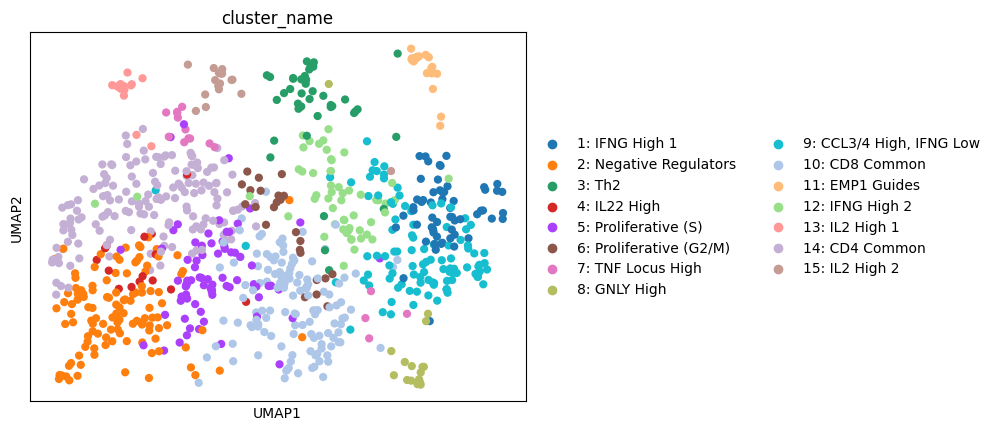

In [8]:
sc.pl.umap(adata, color="cluster_name")

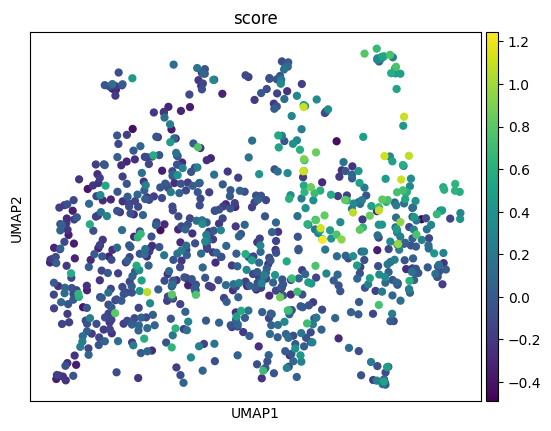

In [9]:
sc.pl.umap(adata, color="score")

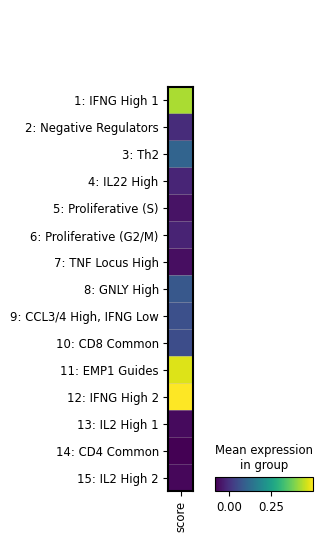

In [10]:
sc.pl.matrixplot(adata, groupby="cluster_name", var_names=["score"])

## Register the processed data

In [11]:
file = ln.File(
    adata, key="perturbseq_analyzed.h5ad", description="analyzed data of perturbseq"
)

💡 file will be copied to default storage upon `save()` with key 'perturbseq_analyzed.h5ad'
💡 data is AnnDataLike, consider using .from_anndata() to link var_names and obs.columns as features


In [12]:
file.save()

✅ storing file '2zRhFpzH2LrNUVjzCkS7' at 'perturbseq_analyzed.h5ad'
... uploading 2zRhFpzH2LrNUVjzCkS7.h5ad: 1.00


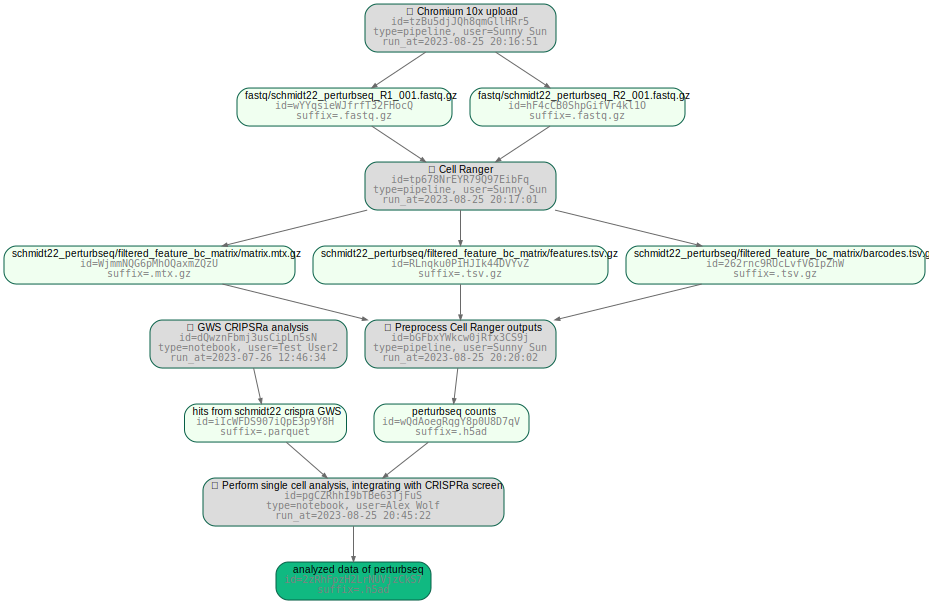

In [13]:
file.view_lineage()